# Working with Molecules from ZINC and ChEMBL

Graphein provides utilities for retrieving molecules and metadata from [ZINC](https://zinc.docking.org/) and [ChEMBL](https://www.ebi.ac.uk/chembl/)

The ZINC database is a curated collection of commercially available chemical compounds prepared especially for virtual screening.


ChEMBL or ChEMBLdb is a manually curated chemical database of bioactive molecules with drug-like properties. It is maintained by the European Bioinformatics Institute, of the European Molecular Biology Laboratory

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/molecules_from_zinc_and_chembl.ipynb) [![GitHub](https://img.shields.io/badge/-View%20on%20GitHub-181717?logo=github&logoColor=ffffff)](https://github.com/a-r-j/graphein/blob/master/notebooks/molecules_from_zinc_and_chembl.ipynb)

In [2]:
# Install Graphein if necessary
# !pip install graphein[extras]

In [3]:
import graphein.molecule as gm

## ZINC
### Mapping between SMILEs and ZINC IDs.

In [4]:
#NBVAL_SKIP
gm.get_smiles_from_zinc("ZINC01234567", backend="zinc15") #Backend allows specification of which ZINC release to use

'C[C@H]1CCCCN1CC#CC(O)(c1ccccc1)c1ccccc1'

We can also map a SMILE string back to ZINC identifiers. 

N.B. we may obtain multiple ZINC IDs. In the example below, we retrieve two ZINC IDs for the two enantiomers of the specified molecule

In [5]:
#NBVAL_SKIP
gm.get_zinc_id_from_smile("C[C@H]1CCCCN1CC#CC(O)(c1ccccc1)c1ccccc1")

['ZINC000001234567', 'ZINC000001234568']

### Constructing Graphs
We can also retrieve the molecular graphs directly from the ZINC ID

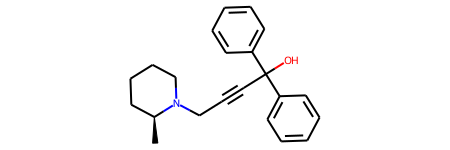

In [6]:
#NBVAL_SKIP
g = gm.construct_graph(zinc_id="ZINC000001234567")
g.graph["rdmol"]

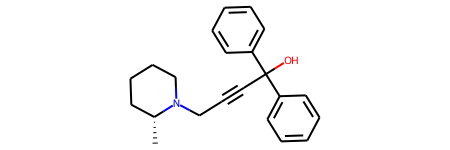

In [8]:
#NBVAL_SKIP
g = gm.construct_graph(zinc_id="ZINC000001234568")
g.graph["rdmol"]

In [18]:
#NBVAL_SKIP
# Here we retrieve the above molecule, generate a 3D conformer and visualise it
config = gm.MoleculeGraphConfig(edge_construction_functions=[gm.add_atom_bonds])

g = gm.construct_graph(zinc_id="ZINC000001234568", generate_conformer=True, config=config)
gm.plotly_molecular_graph(g)

## ChEMBL

Similarly, we can map between ChEMBL identifiers and SMILEs. We can also add ChEMBLs rich metadata to the graph

In [6]:
#NBVAL_SKIP
gm.get_smiles_from_chembl("CHEMBL1234")

WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.


'CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCN.CS(=O)(=O)O'

In [7]:
#NBVAL_SKIP
gm.get_chembl_id_from_smiles("CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCN.CS(=O)(=O)O")

WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.


'CHEMBL1234'

### Constructing Graphs from ChEMBL

WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.


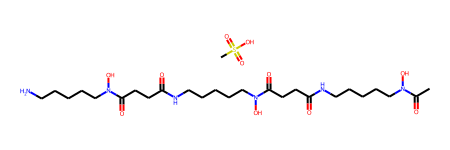

In [9]:
#NBVAL_SKIP
g = gm.construct_graph(chembl_id="CHEMBL1234")
g.graph["rdmol"]

### Retrieving Metadata from ChEMBL

We can retrieve metadata from chembl both functionally and via the graph construction config.

In [13]:
#NBVAL_SKIP
# Functionally

g = gm.add_chembl_metadata(g)
print(g.graph["chembl_metadata"])

WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.


{'atc_classifications': [], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 31460, 'chirality': 2, 'cross_references': [{'xref_id': 'deferoxamine%20mesylate', 'xref_name': 'deferoxamine mesylate', 'xref_src': 'DailyMed'}, {'xref_id': '11112937', 'xref_name': 'SID: 11112937', 'xref_src': 'PubChem'}, {'xref_id': '11533050', 'xref_name': 'SID: 11533050', 'xref_src': 'PubChem'}, {'xref_id': '124882730', 'xref_name': 'SID: 124882730', 'xref_src': 'PubChem'}, {'xref_id': '144204292', 'xref_name': 'SID: 144204292', 'xref_src': 'PubChem'}, {'xref_id': '170464752', 'xref_name': 'SID: 170464752', 'xref_src': 'PubChem'}, {'xref_id': '26747967', 'xref_name': 'SID: 26747967', 'xref_src': 'PubChem'}], 'dosed_ingredient': True, 'first_approval': 1968, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Antidote (to iron poisoning); Chelating Agent', 'inorganic_flag': 0, 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL1234', 'molecule_hierarchy': {'mol

In [15]:
# Via Config
config = gm.MoleculeGraphConfig(graph_metadata_functions=[gm.add_chembl_metadata])
g = gm.construct_graph(chembl_id="CHEMBL1234", config=config)
g.graph["chembl_metadata"]

WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
WARNING [bioservices:ChEMBL:119]:  The URL (https://www.ebi.ac.uk/chembl/api/data) provided cannot be reached.
W

{'atc_classifications': [],
 'availability_type': 1,
 'biotherapeutic': None,
 'black_box_warning': 0,
 'chebi_par_id': 31460,
 'chirality': 2,
 'cross_references': [{'xref_id': 'deferoxamine%20mesylate',
   'xref_name': 'deferoxamine mesylate',
   'xref_src': 'DailyMed'},
  {'xref_id': '11112937', 'xref_name': 'SID: 11112937', 'xref_src': 'PubChem'},
  {'xref_id': '11533050', 'xref_name': 'SID: 11533050', 'xref_src': 'PubChem'},
  {'xref_id': '124882730',
   'xref_name': 'SID: 124882730',
   'xref_src': 'PubChem'},
  {'xref_id': '144204292',
   'xref_name': 'SID: 144204292',
   'xref_src': 'PubChem'},
  {'xref_id': '170464752',
   'xref_name': 'SID: 170464752',
   'xref_src': 'PubChem'},
  {'xref_id': '26747967',
   'xref_name': 'SID: 26747967',
   'xref_src': 'PubChem'}],
 'dosed_ingredient': True,
 'first_approval': 1968,
 'first_in_class': 0,
 'helm_notation': None,
 'indication_class': 'Antidote (to iron poisoning); Chelating Agent',
 'inorganic_flag': 0,
 'max_phase': 4,
 'molecu